$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 5** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Clustering**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 21/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Joakim Milleson, 940210-6497, joamill@student.chalmers.se;
                                                Tobias Alldén, 19950222-4158, allden@student.chalmers.se ** <br />

General guidelines:
* Since there is no theoretical part for this assigment, submit this ipynb only (with completed code/results).
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above.
* All datasets can be downloaded from the course website.
* All plots/tables and other relevant information should be included.

# Practical problems

The follwing code might be useful for this excercise.

```python
import scipy.io
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
```

## [K-Means Implementation, 20 points]

a. Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. Use (uniformly) random points from the data as initialization for the centroids. Terminate the iterative procedure when the the cluster assignments do not change.

b. Run your implementation on the matrix $X$ in **hw5_p1a.mat** with $k=2$. Each row of the matrix is an observation, and each column is a feature. Store the cluster assignment both after 2 iterations, and at convergence. Produce a scatter plot of the data with colors indicating the cluster assignments at convergence and highlight points that have changed assignment after the second iteration.

c. Implement the kernel $k$-means algorithm as described in the lecture, using the Gaussian RBF-kernel.

d. Run the linear $k$-means **and** your kernel $k$-means on **hw5_p1b.mat** with $k=2$. For the Gaussian RBF-kernel, use $\sigma=0.2$. Produce scatter plots of the data, with color indicating the cluster assignment at convergence, one plot for each of the algorithms.

In [115]:
def KMeans(k, data):
    # Create empty means array
    means = np.zeros([len(data),k]);
    # Empty list for assignments after second it
    assignments2Iterations = np.empty([len(data),k]);
    
    # Assignments
    assignments = np.zeros([len(data),k])
    
    # Assignments in previous iteration, initially empty
    oldAssignments = np.empty([len(data),k])
    
    # Select K random means from the dataPoints
    for i in range(0,k):
        means[i] = data[random.randint(0, len(data))]
    iterations = 1;
    
    # Run loop while the assignments changes each iteration
    while not np.array_equal(oldAssignments,assignments):
        
        # Save current assignment if we are in iteration 2
        if iterations == 2:
            assignments2Iterations = list(assignments)
        iterations += 1
        
        # Copy previous assignments
        oldAssignments = assignments
        # Reset
        assignments = np.zeros([len(data),k])

        # For each data point, check which mean point is the closest via calculation of the distance. 
        for dataPoint in range(0,len(data)):
            minDist, closestMean = np.inf, 0
            for kernel in range(0,k):
                distance = dist(data[dataPoint],means[kernel])
                if distance < minDist:
                    minDist = distance
                    closestMean = kernel
            assignments[dataPoint, closestMean] = 1 ## This datapoint is closest to this mean
        
        # Sum to recompute the means.
        for i in range(0,k):
            term1 = 0
            term2 = 0
            for n in range(0,len(data)):
                term1 += assignments[n,i]*data[n]
                term2 += assignments[n,i]
            
            means[i] = term1/term2
            
    return assignments, assignments2Iterations, means
    
# Euclidian distance
def dist(mu,x):
    return np.linalg.norm(np.array(mu)-np.array(x))


In [113]:
def GaussKMeans(k, data, alpha):
    # Create a random set of z_n's
    zeds = np.random.randint(2, size=(len(data), k))
    # Zeds in previous iteration, initially all zeroes
    prevZeds = np.empty([len(data),k])
    
    # While assignemnts have not changed
    while not(np.array_equal(zeds, prevZeds)):
        # copy
        prevZeds = zeds
        # Reset
        zeds = np.zeros([len(data),k])
        # Distances to the means
        distances = np.full([len(data),1],np.inf)
        
        # For each kernel, calculate the points that are the nearest. Via formula described in the lectures.
        for kernel in range(0,k):
            kernelZedSum = np.sum(prevZeds[:,kernel]) #N_k in the slides
            part3 = 0; # Second sum  
            
            # Compute the second sum
            for m in range(0,len(data)):
                for l in range(0,len(data)):
                    part3 += prevZeds[m,kernel]*prevZeds[l,kernel]*gaussKernel(data[m],data[l],alpha)
            part3 *= 1 / (kernelZedSum**2)
            
            # First sum and kernel part (we calculate the secund firstly to not have mutiple nestled arrays)
            for n in range(0,len(data)):
                part2 = 0;
                for m in range(0,len(data)):
                    part2 += prevZeds[m,kernel]*gaussKernel(data[n],data[m],alpha)
                part2 *= - 2 / kernelZedSum
                
                # Calculate distance to kernel center
                length = gaussKernel(data[n],data[n],alpha) + part2 + part3
                
                # check if new mean is closer
                if length < distances[n]:
                    distances[n] = length
                    zeds[n,kernel] = 1
                    zeds[n,kernel-1] = 0 # Closer than the previous one 
    return zeds
                
                
                
# Euclidian data
def gaussKernel(x1,x2,alpha):
    return np.exp( - np.power(np.linalg.norm(x1-x2),2) / (2*np.power(alpha,2))) 


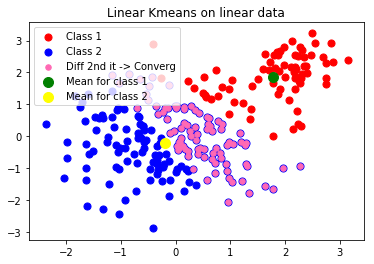

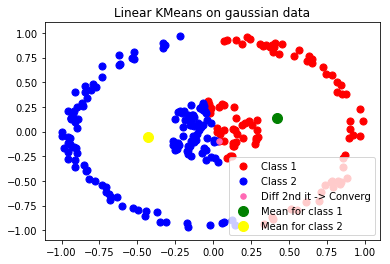

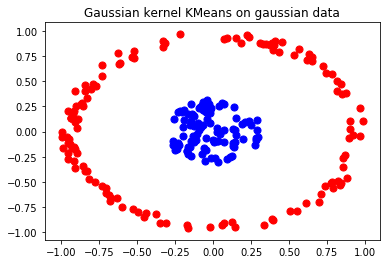

In [114]:
import scipy.io
import random
import numpy as np;
import matplotlib.pyplot as plt
mat1 = scipy.io.loadmat('hw5_p1a.mat')
mat2 = scipy.io.loadmat('hw5_p1b.mat')
D1 = mat1['X']
D2 = mat2['X']

# B)
convergence, assignment2Iterations, mean = KMeans(2,D1);
group11 = D1[convergence[:,0]==1]
group12 = D1[convergence[:,1]==1]
diff1 = D1[convergence!=assignment2Iterations]


# Linear on data 1
plt.scatter(group11[:,:1],group11[:,-1],c='red', s=50, label="Class 1")
plt.scatter(group12[:,:1],group12[:,-1],c='blue', s=50, label="Class 2")
plt.scatter(diff1[0::2],diff1[1::2],c='hotpink', s=30, label="Diff 2nd it -> Converg")
plt.scatter(np.array(mean[0][0]).T,np.array(mean[0][1]).T,c='green',s=100, label="Mean for class 1")
plt.scatter(np.array(mean[1][0]).T,np.array(mean[1][1]).T,c='yellow',s=100, label ="Mean for class 2")
plt.title("Linear Kmeans on linear data")
plt.legend();
plt.show();

# Linear on data 2
convergence2, assignment2Iterations2, mean2 = KMeans(2,D2);
group21 = D2[convergence2[:,0]==1]
group22 = D2[convergence2[:,1]==1]
diff2 = D2[convergence2!=assignment2Iterations2]

# Plot the data
plt.scatter(group21[:,:1],group21[:,-1],c='red', s=50, label="Class 1")
plt.scatter(group22[:,:1],group22[:,-1],c='blue', s=50, label="Class 2")
plt.scatter(diff2[0::2],diff2[1::2],c='hotpink', s=30, label="Diff 2nd it -> Converg")
plt.scatter(np.array(mean2[0][0]).T,np.array(mean2[0][1]).T,c='green',s=100, label="Mean for class 1")
plt.scatter(np.array(mean2[1][0]).T,np.array(mean2[1][1]).T,c='yellow',s=100, label ="Mean for class 2")
plt.legend();
plt.title("Linear KMeans on gaussian data")
plt.show();

# Gaussian Kernel Kmeans
assignments = GaussKMeans(2,D2,0.2)
group31 = D2[assignments[:,0] == 1]
group32 = D2[assignments[:,1] == 1]


# Gaussian on data 2
plt.scatter(group31[:,:1], group31[:,-1],c='red', s=50, label="Class 1")
plt.scatter(group32[:,:1], group32[:,-1],c='blue', s=50, label="Class 2")
plt.title("Gaussian kernel KMeans on gaussian data")
plt.show()


